### Chicago Public Schools & Census datasets using SQL and Python

#### Objectives

*   Pre-process dataset for Chicago Public School level performance
*   Store dataset in SQLite database.
*   Retrieve metadata about tables and columns and query data from mixed case columns
*   Use SQL (& Python) to analyze level performance from Chicago Public Schools data


#### Chicago Public Schools - Progress Report Cards (2011-2012)

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: [https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&download=true&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

**NOTE**:

Download a static copy which is a more database friendly version from this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01">link</a>.

##### Connecting to the database

In [1]:
import csv, sqlite3

con = sqlite3.connect("RealWorldData.db")
cur = con.cursor()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///RealWorldData.db

Connecting to 'sqlite:///RealWorldData.db'

##### Storing the dataset in a Table and displaying number of rows.

In [5]:
import pandas as pd
#df = pd.read_csv('https://data.cityofchicago.org/resource/9xs2-f89t.csv')
#df.to_sql('https://data.cityofchicago.org/resource/9xs2-f89t.csv', con)
#df.shape

df1 = pd.read_csv(r"C:\Users\c9onz\Documents\Christine Gonzalez_Confidential_DO_NOT_ACCESS\Chris Gonz_Confidential\Data Analysis Studies\Datasets\IBM datasets\ChicagoPublicSchools.csv")
df1.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")

566

In [6]:
df2 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
#df2 = pd.read_csv(r"C:\Users\c9onz\Documents\Christine Gonzalez_Confidential_DO_NOT_ACCESS\Chris Gonz_Confidential\Data Analysis Studies\Datasets\IBM datasets\ChicagoCensusData.csv")
df2.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")

78

##### Querying the database system catalog to retrieve table metadata

In [7]:
%sql SELECT name FROM sqlite_master WHERE type='table'

Running query in 'sqlite:///RealWorldData.db'

name
CHICAGO_PUBLIC_SCHOOLS_DATA
CENSUS_DATA


##### Querying the database system catalog to retrieve column metadata and number of columns

In [ ]:
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

Running query in 'sqlite:///RealWorldData.db'

count(name)
78


##### Retrieving list of columns in SCHOOLS table and their column type (datatype) and length.

In [ ]:
df1.columns
%sql SELECT name, type, length(type) FROM PRAGMA_table_info('CHICAGO_PUBLIC_SCHOOLS_DATA')

Running query in 'sqlite:///RealWorldData.db'

name,type,length(type)
School_ID,INTEGER,7
NAME_OF_SCHOOL,TEXT,4
"Elementary, Middle, or High School",TEXT,4
Street_Address,TEXT,4
City,TEXT,4
State,TEXT,4
ZIP_Code,INTEGER,7
Phone_Number,TEXT,4
Link,TEXT,4
Network_Manager,TEXT,4


##### Questions

1. How many Elementary Schools are in the dataset?

In [ ]:
%sql SELECT COUNT(*) FROM CHICAGO_PUBLIC_SCHOOLS_DATA WHERE "Elementary, Middle, or High School" = 'ES'

Running query in 'sqlite:///RealWorldData.db'

COUNT(*)
462


2. What is the highest Safety Score?

In [11]:
%sql SELECT MAX(SAFETY_SCORE) AS HIGHEST_SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS_DATA

Running query in 'sqlite:///RealWorldData.db'

HIGHEST_SAFETY_SCORE
99.0


3. Which schools have highest Safety Score?

In [12]:
%sql SELECT NAME_OF_SCHOOL, COMMUNITY_AREA_NAME FROM CHICAGO_PUBLIC_SCHOOLS_DATA WHERE SAFETY_SCORE = 99

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,COMMUNITY_AREA_NAME
Abraham Lincoln Elementary School,LINCOLN PARK
Alexander Graham Bell Elementary School,NORTH CENTER
Annie Keller Elementary Gifted Magnet School,MOUNT GREENWOOD
Augustus H Burley Elementary School,LAKE VIEW
Edgar Allan Poe Elementary Classical School,PULLMAN
Edgebrook Elementary School,FOREST GLEN
Ellen Mitchell Elementary School,WEST TOWN
James E McDade Elementary Classical School,CHATHAM
James G Blaine Elementary School,LAKE VIEW
LaSalle Elementary Language Academy,LINCOLN PARK


4a. What are the top 10 schools with the highest "Average Student Attendance"?

In [13]:
%sql SELECT NAME_OF_SCHOOL, COMMUNITY_AREA_NAME FROM CHICAGO_PUBLIC_SCHOOLS_DATA ORDER BY AVERAGE_STUDENT_ATTENDANCE DESC LIMIT 10;

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,COMMUNITY_AREA_NAME
John Charles Haines Elementary School,ARMOUR SQUARE
James Ward Elementary School,ARMOUR SQUARE
Edgar Allan Poe Elementary Classical School,PULLMAN
Orozco Fine Arts & Sciences Elementary School,LOWER WEST SIDE
Rachel Carson Elementary School,GAGE PARK
Annie Keller Elementary Gifted Magnet School,MOUNT GREENWOOD
Andrew Jackson Elementary Language Academy,NEAR WEST SIDE
Lenart Elementary Regional Gifted Center,CHATHAM
Disney II Magnet School,IRVING PARK
John H Vanderpoel Elementary Magnet School,BEVERLY


4b. Retrieving list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance

In [14]:
%sql SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE FROM CHICAGO_PUBLIC_SCHOOLS_DATA ORDER BY AVERAGE_STUDENT_ATTENDANCE LIMIT 5;

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%


4c. Removing the '%' sign from the above result set for Average Student Attendance column so data points look cleaner.

In [15]:
%%sql SELECT NAME_OF_SCHOOL, REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%', '') 
    FROM CHICAGO_PUBLIC_SCHOOLS_DATA ORDER BY AVERAGE_STUDENT_ATTENDANCE LIMIT 5;

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,"REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%' , '' )"
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00


5. Which Schools have Average Student Attendance lower than 70%?

In [16]:
%sql SELECT NAME_OF_SCHOOL, COMMUNITY_AREA_NAME FROM CHICAGO_PUBLIC_SCHOOLS_DATA WHERE AVERAGE_STUDENT_ATTENDANCE < 70

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,COMMUNITY_AREA_NAME
Barbara Vick Early Childhood & Family Center,MORGAN PARK
Chicago Vocational Career Academy High School,AVALON PARK
Dyett High School,WASHINGTON PARK
Manley Career Academy High School,EAST GARFIELD PARK
Orr Academy High School,HUMBOLDT PARK
Richard T Crane Technical Preparatory High School,NEAR WEST SIDE
Roberto Clemente Community Academy High School,WEST TOWN
Wendell Phillips Academy High School,DOUGLAS


6. What are the 5 schools with lowest safety score?

In [17]:
%%sql SELECT NAME_OF_SCHOOL, MIN(SAFETY_SCORE)
    FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
    WHERE SAFETY_SCORE >= 1.0
    GROUP BY NAME_OF_SCHOOL
    ORDER BY SAFETY_SCORE
    LIMIT 5

Running query in 'sqlite:///RealWorldData.db'

NAME_OF_SCHOOL,MIN(SAFETY_SCORE)
Edmond Burke Elementary School,1.0
Luke O'Toole Elementary School,5.0
George W Tilton Elementary School,6.0
Foster Park Elementary School,11.0
Emil G Hirsch Metropolitan High School,13.0


7. What's the total College Enrollment for each Community Area?

In [18]:
%%sql SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLLMENT
    FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
GROUP BY COMMUNITY_AREA_NAME
ORDER BY TOTAL_ENROLLMENT DESC
LIMIT 10

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
SOUTH LAWNDALE,14793
BELMONT CRAGIN,14386
AUSTIN,10933
GAGE PARK,9915
BRIGHTON PARK,9647
WEST TOWN,9429
HUMBOLDT PARK,8620
WEST RIDGE,8197
NEAR WEST SIDE,7975
NEW CITY,7922


8a. What are the 5 Community Areas with the lowest total College Enrollment?

In [19]:
%%sql SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLLMENT
FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
GROUP BY COMMUNITY_AREA_NAME
ORDER BY TOTAL_ENROLLMENT
LIMIT 5;

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


8b. What are the incomes per capita for the areas with the lowest College Enrollment?

In [20]:
%%sql WITH AREA AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS LOWEST_TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
GROUP BY COMMUNITY_AREA_NAME 
ORDER BY LOWEST_TOTAL_ENROLL
LIMIT 5)
SELECT CD.COMMUNITY_AREA_NAME, CD.PER_CAPITA_INCOME, A.LOWEST_TOTAL_ENROLL 
FROM CENSUS_DATA CD 
JOIN AREA A 
ON CD.COMMUNITY_AREA_NUMBER = A.COMMUNITY_AREA_NUMBER

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PER_CAPITA_INCOME,LOWEST_TOTAL_ENROLL
Oakland,19252,140
Fuller Park,10432,531
Burnside,12515,549
O'Hare,25828,786
Loop,65526,871


9a. What 5 community areas have the highest total college enrollment?

In [21]:
%%sql SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
GROUP BY COMMUNITY_AREA_NAME 
ORDER BY TOTAL_ENROLL DESC
LIMIT 5

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,TOTAL_ENROLL
SOUTH LAWNDALE,14793
BELMONT CRAGIN,14386
AUSTIN,10933
GAGE PARK,9915
BRIGHTON PARK,9647


9b. What are the incomes per capita for the community areas with the highest total college enrollment?

In [22]:
%%sql WITH HIGH AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS HIGHEST_TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA
GROUP BY COMMUNITY_AREA_NAME
ORDER BY HIGHEST_TOTAL_ENROLL DESC
LIMIT 5)
SELECT H.COMMUNITY_AREA_NAME, CD.PER_CAPITA_INCOME, H.HIGHEST_TOTAL_ENROLL
FROM CENSUS_DATA CD 
JOIN HIGH H 
ON CD.COMMUNITY_AREA_NUMBER = H.COMMUNITY_AREA_NUMBER

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PER_CAPITA_INCOME,HIGHEST_TOTAL_ENROLL
SOUTH LAWNDALE,10402,14793
BELMONT CRAGIN,15461,14386
AUSTIN,15957,10933
GAGE PARK,12171,9915
BRIGHTON PARK,13089,9647


10a. What percentage of households are below the federal poverty line and in the community areas with the lowest college enrollment?

In [23]:
%%sql WITH POVERTY AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA
GROUP BY COMMUNITY_AREA_NAME
ORDER BY TOTAL_ENROLL
LIMIT 5)
SELECT P.COMMUNITY_AREA_NAME, CD.PERCENT_HOUSEHOLDS_BELOW_POVERTY
FROM CENSUS_DATA CD 
JOIN POVERTY P 
ON CD.COMMUNITY_AREA_NUMBER = P.COMMUNITY_AREA_NUMBER 

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
OAKLAND,39.7
FULLER PARK,51.2
BURNSIDE,33.0
OHARE,15.4
LOOP,14.7


10b. What percentage of households are below the federal poverty line and in the community areas with the highest college enrollment?

In [24]:
%%sql WITH POVERTY AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA
GROUP BY COMMUNITY_AREA_NAME
ORDER BY TOTAL_ENROLL DESC
LIMIT 5)
SELECT P.COMMUNITY_AREA_NAME, CD.PERCENT_HOUSEHOLDS_BELOW_POVERTY
FROM CENSUS_DATA CD 
JOIN POVERTY P 
ON CD.COMMUNITY_AREA_NUMBER = P.COMMUNITY_AREA_NUMBER

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
SOUTH LAWNDALE,30.7
BELMONT CRAGIN,18.7
AUSTIN,28.6
GAGE PARK,23.4
BRIGHTON PARK,23.6


11. What percentage are under 18 or over 64 years of age from the areas with the highest and lowest total college enrollment?

In [25]:
%%sql WITH UNDER AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS HIGHEST_TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA
GROUP BY COMMUNITY_AREA_NAME
ORDER BY HIGHEST_TOTAL_ENROLL DESC
LIMIT 5)
SELECT U.COMMUNITY_AREA_NAME, CD.PERCENT_AGED_UNDER_18_OR_OVER_64, CD.PER_CAPITA_INCOME, U.HIGHEST_TOTAL_ENROLL
FROM CENSUS_DATA CD 
JOIN UNDER U 
ON CD.COMMUNITY_AREA_NUMBER = U.COMMUNITY_AREA_NUMBER

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HIGHEST_TOTAL_ENROLL
SOUTH LAWNDALE,33.8,10402,14793
BELMONT CRAGIN,37.3,15461,14386
AUSTIN,37.9,15957,10933
GAGE PARK,38.8,12171,9915
BRIGHTON PARK,39.3,13089,9647


In [26]:
%%sql WITH UNDER AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS LOWEST_TOTAL_ENROLL
FROM CHICAGO_PUBLIC_SCHOOLS_DATA
GROUP BY COMMUNITY_AREA_NAME
ORDER BY LOWEST_TOTAL_ENROLL
LIMIT 5)
SELECT U.COMMUNITY_AREA_NAME, CD.PERCENT_AGED_UNDER_18_OR_OVER_64, CD.PER_CAPITA_INCOME, U.LOWEST_TOTAL_ENROLL
FROM CENSUS_DATA CD 
JOIN UNDER U 
ON CD.COMMUNITY_AREA_NUMBER = U.COMMUNITY_AREA_NUMBER

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NAME,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,LOWEST_TOTAL_ENROLL
OAKLAND,40.4,19252,140
FULLER PARK,44.9,10432,531
BURNSIDE,42.7,12515,549
OHARE,30.3,25828,786
LOOP,13.5,65526,871


The table above shows a higher percentage of people under 18 and over 64 years old in areas with the lowest college enrollments. As their percentages increase, the income per capita decreases. This may be due to other attributes which are unaccounted for, including cost-of-living expenses, and being retired or unemployed.

12. What's the hardship index for the community area of the school which has College Enrollment of 4368?

In [27]:
%%sql select hardship_index 
from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number and college_enrollment = 4368

Running query in 'sqlite:///RealWorldData.db'

HARDSHIP_INDEX
6.0


13. What's the hardship index for the community area which has the highest value for College Enrollment?

In [28]:
%%sql SELECT COMMUNITY_AREA_NUMBER, HARDSHIP_INDEX 
FROM CENSUS_DATA
WHERE COMMUNITY_AREA_NUMBER IN (SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_PUBLIC_SCHOOLS_DATA ORDER BY COLLEGE_ENROLLMENT DESC LIMIT 1)

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NUMBER,HARDSHIP_INDEX
5.0,6.0


The above query shows one way the IBM Lab suggested we answer the question, but it's actually incorrect.

In [29]:
%%sql WITH HIGHEST_VAL AS (SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLLMENT 
    FROM CHICAGO_PUBLIC_SCHOOLS_DATA 
    GROUP BY COMMUNITY_AREA_NAME
    ORDER BY TOTAL_ENROLLMENT DESC
    LIMIT 1)
SELECT COMMUNITY_AREA_NUMBER, HARDSHIP_INDEX
FROM CENSUS_DATA
WHERE COMMUNITY_AREA_NUMBER IN (SELECT COMMUNITY_AREA_NUMBER FROM HIGHEST_VAL)

Running query in 'sqlite:///RealWorldData.db'

COMMUNITY_AREA_NUMBER,HARDSHIP_INDEX
30.0,96.0


In order to get a more accurate result, I wrote the query above which first queries the data to return total college enrollment by community area, and follows with additional queries to identify the hardship index for the community area with the highest number of college enrollments. 

##### Plotting
1. To test for correlation among attributes, we can create a scatter plot with python across all data points. Before creating the plots, I perform a join of the relevant columns and review the new dataframe in another cell.

In [30]:
df1_com = df1.groupby(['COMMUNITY_AREA_NAME', 'COMMUNITY_AREA_NUMBER'], as_index=False)['COLLEGE_ENROLLMENT'].sum()
df2_com = df2[['COMMUNITY_AREA_NUMBER','PER_CAPITA_INCOME','PERCENT_AGED_UNDER_18_OR_OVER_64','PERCENT_HOUSEHOLDS_BELOW_POVERTY']]
#df_join = pd.concat([df1_com, df2_com], ignore_index=True)
df_join = pd.merge(df1_com, df2_com, on='COMMUNITY_AREA_NUMBER', how='inner')

In [31]:
df_join.head()

,COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,COLLEGE_ENROLLMENT,PER_CAPITA_INCOME,PERCENT_AGED_UNDER_18_OR_OVER_64,PERCENT_HOUSEHOLDS_BELOW_POVERTY
0,ALBANY PARK,14,6864,21323,32.0,19.2
1,ARCHER HEIGHTS,57,4823,16134,39.2,14.1
2,ARMOUR SQUARE,34,1458,16148,38.3,40.1
3,ASHBURN,70,6483,23482,36.9,10.4
4,AUBURN GRESHAM,71,4175,15528,41.9,27.6


2. Subplotting with scatter plot and boxplot

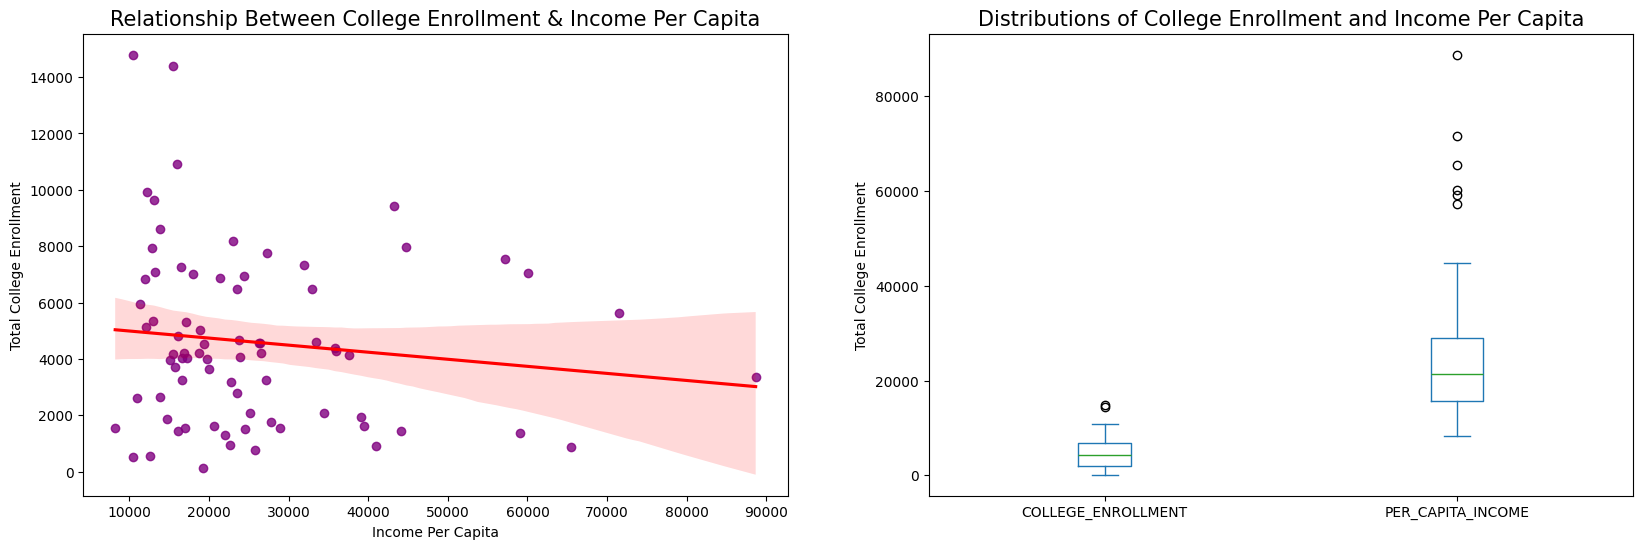

In [32]:
df_join_2 = df_join[['COLLEGE_ENROLLMENT','PER_CAPITA_INCOME']]

fig= plt.figure(figsize=(20,6))

ax0 = fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)


sns.regplot(x = df_join[['PER_CAPITA_INCOME']], y=df_join[['COLLEGE_ENROLLMENT']], color = 'purple', line_kws={'color':'red'}, ax=ax0)

ax0.set_xlabel("Income Per Capita")
ax0.set_ylabel("Total College Enrollment")
ax0.set_title('Relationship Between College Enrollment & Income Per Capita', fontsize=(15))

df_join_2.plot(kind='box', ax=ax1)
ax1.set_ylabel("Total College Enrollment")
ax1.set_title('Distributions of College Enrollment and Income Per Capita', fontsize=(15))

plt.show()

Figure 2-1. Scatter plot with regression line and boxplot showing distributions of income per capita and total college enrollment by area

We can see in the above scatter plot that no correlation exists between college enrollments and income per capita. Since no correlation was observed between attributes, the boxplot on the right was used to visualize the distribution of those datapoints.<br><br> 
Initial Observations:
* The boxplot depicts concentrations < 20,000 of college enrollment across all 77 community areas, and a wide income per capita distribution range (between 10,000 and 50,000).
* Income per capita shows a greater percentage of outliers (between 55,000 and 90,000) in comparison. 

But, first, lets confirm these distributions by identifying the IQR, Q1, and Q3

In [33]:
Q3 = 28887.00
Q1 = 15754
IQR = Q3 - Q1
LOWER_FENCE = Q1 - (1.5*IQR)
UPPER_FENCE = Q3 + (1.5*IQR)
print(LOWER_FENCE) # -3945.5
print(UPPER_FENCE) # 48586.5


-3945.5
48586.5


Now, lets clarify the outliers from these data points. 

In [34]:
OUTLIERS_U = df_join[df_join['PER_CAPITA_INCOME'] > UPPER_FENCE]
OUTLIERS_U.sort_values(by=['PER_CAPITA_INCOME'], ascending=False, axis=0)

,COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,COLLEGE_ENROLLMENT,PER_CAPITA_INCOME,PERCENT_AGED_UNDER_18_OR_OVER_64,PERCENT_HOUSEHOLDS_BELOW_POVERTY
47,NEAR NORTH SIDE,8,3362,88669,22.6,12.9
38,LINCOLN PARK,7,5615,71551,21.5,12.3
41,LOOP,32,871,65526,13.5,14.7
37,LAKE VIEW,6,7055,60058,17.0,11.4
48,NEAR SOUTH SIDE,33,1378,59077,21.8,13.8
51,NORTH CENTER,5,7541,57123,26.2,7.5


In [35]:
OUTLIERS_L = df_join[(df_join['PER_CAPITA_INCOME'] < Q1) & (df_join['PER_CAPITA_INCOME'] > LOWER_FENCE)]
OUTLIERS_L.sort_values(by=['PER_CAPITA_INCOME'], ascending=False, axis=0)

,COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,COLLEGE_ENROLLMENT,PER_CAPITA_INCOME,PERCENT_AGED_UNDER_18_OR_OVER_64,PERCENT_HOUSEHOLDS_BELOW_POVERTY
4,AUBURN GRESHAM,71,4175,15528,41.9,27.6
8,BELMONT CRAGIN,19,14386,15461,37.3,18.7
31,HERMOSA,20,3975,15089,36.4,20.5
63,SOUTH DEERING,51,1859,14685,39.5,29.2
68,WASHINGTON PARK,40,2648,13785,42.8,42.1
32,HUMBOLDT PARK,23,8620,13781,38.0,33.9
15,CHICAGO LAWN,66,7086,13231,40.6,27.9
11,BRIGHTON PARK,58,9647,13089,39.3,23.6
19,EAST GARFIELD PARK,27,5337,12961,43.2,42.4
50,NEW CITY,61,7922,12765,38.9,29.0


Income Distribution and Outliers:
* Upper fence ranges between 28,887 and 48,586.5. Data points range from 28,887 and 44,689
* Lower fence ranges between -3945.5 and 15,754. Data points range from 8,201 and 15,754  
* Outliers falling outside of the upper fence range between 57,123 and 88,669
* Outliers falling below lower fence are not applicable 

The vast majority of college enrollments coincide in community areas where incomes range across the lower fence to Q3. This may reflect:<br> 
a) generations' belief that better opportunities exist from attaining a higher education level, or<br> 
b) a system that encourages more college participation across these populations and school districts 

Outliers may suggest:<br> 
a) higher incomes do not bear any direct influence on the number of college enrollments, and<br> 
b) higher income demographics do not reflect the majority of households with children

3. But, what about income per capita and those aged under 18 and over 64 years?

<Axes: xlabel='PER_CAPITA_INCOME', ylabel='PERCENT_AGED_UNDER_18_OR_OVER_64'>

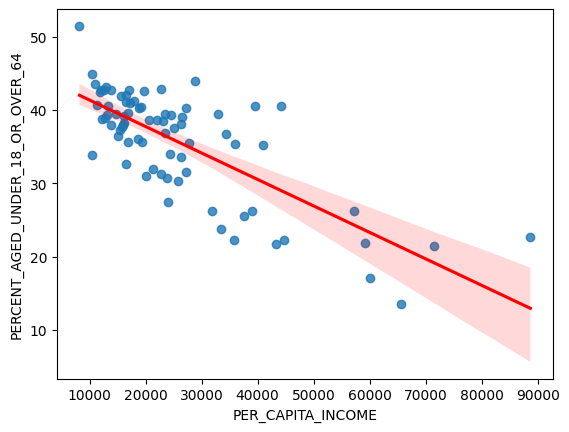

In [36]:
sns.regplot(x=df_join[['PER_CAPITA_INCOME']], y=df_join[['PERCENT_AGED_UNDER_18_OR_OVER_64']], line_kws={'color':'red'})

Figure 3-1. Scatter plot with regression line showing relationship between income per capita and percent aged under 18 or over 64.<br><br>
In the above plot, a negative correlation is observed between the percentage of people under 18 or over 64 and income per capita. That is to say as this population decreases, income per capita increases. In question 11, the table assumes the inverse relationship.

4. What would this plot show if those percentages were paired against households below the federal poverty line?

The Correlation coefficient of these attributes are: [0.43553733] P-value is: [7.53049052e-05]


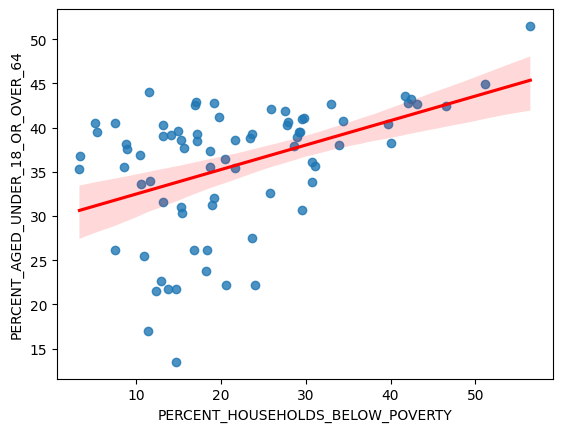

In [37]:
from scipy import stats

sns.regplot(x=df_join[['PERCENT_HOUSEHOLDS_BELOW_POVERTY']], y=df_join[['PERCENT_AGED_UNDER_18_OR_OVER_64']], line_kws={'color':'red'}, data=df_join)

pearson_coef,p_value = stats.pearsonr(df_join[['PERCENT_HOUSEHOLDS_BELOW_POVERTY']], df_join[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
print("The Correlation coefficient of these attributes are:", pearson_coef, "P-value is:", p_value)

Figure 4-1. Scatter plot with regression line showing relationship between percent of households below poverty against the under 18 and over 64 age group.<br><br>
As expected, the plot above demonstrates moderate positive correlation between the two attributes and is validated by its correlation coefficient and p-value. This could mean:
* Individuals in the under 18 and over 64 age group experience more instances of poverty in Chicago, and likely more instances of unemployment. 
* These individuals may represent those looking to enter the workforce and those exiting due to retirement or other factors.

#### Key Findings & Suggestions:
* The 'under 18 and over 64' population may reflect the vast majority of Chicago community areas with higher college enrollment and may be indicative of generations' belief that better opportunities result from higher education, or are in community areas which are targeted for college enrollment.
* The 'under 18 and over 64' population also represents those entering or new to the workforce or those exiting as mentioned above.
* Areas with higher income per capita - especially outliers - do not reflect the majority of households with children and do not directly influence college enrollment.
* As the 'under 18 and over 64' population increases, the percentage of households falling below the poverty line increases.
* Top 5 areas with highest college enrollment: South Lawndale, Belmont Cragin, Austin, Gage Park, and Brighton Park
* Top 5 areas with lowest college enrollment: Oakland, Fuller Park, Burnside, O'Hare, and Loop

Due to data limitations, a spatial analysis covering demographics, unemployment rates, zoning, and population data would provide a better understanding of the distributions, including occupation types and industry. This can help shape programs designed to increase college enrollment - since total enrollments < 20,000 still seem low - as well as reduce unemployment gaps and the percentage of households which fall below the federal poverty line. 


Author of the Original IBM Lab

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Rav Ahuja</a>
<h5 align="center"> © IBM Corporation 2020. All rights reserved. <h5/>
